In [36]:
import os
import webknossos as wk
from matplotlib import pyplot as plt
import numpy as np

os.environ['WK_URL'] = "http://dl.ash2txt.org:8080/"
os.environ['WK_TOKEN'] = "64ZRFDrbuWkM5FMv96cdnQ"

In [46]:
with wk.webknossos_context(url="http://dl.ash2txt.org:8080/", token="64ZRFDrbuWkM5FMv96cdnQ"):
    annotation = wk.Annotation.download("678d6a81010000a433ee6464")


In [64]:
print(annotation)

Annotation(name='first_letters_segment.wkw__explorational__sjohnson__ee6464', skeleton=Skeleton(_child_groups=<No child groups>, _child_trees=<No child trees>, voxel_size=(7.91, 7.91, 7.91), dataset_name='first_letters_segment.wkw', organization_id='Scroll_Prize', description=''), _dataset_name=None, _voxel_size=None, _organization_id=None, _description=None, owner_name='sean johnson', annotation_id='678d6a81010000a433ee6464', time=1737321089179, edit_position=(2554.0, 1039.0, 35.0), edit_rotation=(0.0, 0.0, 0.0), zoom_level=1.2099999999999997, metadata={'writer': 'NmlWriter.scala', 'writerGitCommit': '9fbc67adba519db14c5fb7dee489f0221c379b25', 'timestamp': '1737323318047'}, task_bounding_box=None, user_bounding_boxes=[], _volume_layers=[_VolumeLayer(id=0, name='Volume', fallback_layer_name=None, data_format=<DataFormat.WKW: 'wkw'>, zip=Path(None, 'data_Volume.zip'), segments={3: SegmentInformation(name=None, anchor_position=Vec3Int(2101,1183,37, axes=('x', 'y', 'z')), color=None)}, la

In [67]:

with wk.webknossos_context(url="http://dl.ash2txt.org:8080/", token="64ZRFDrbuWkM5FMv96cdnQ"):
    dataset = annotation.get_remote_annotation_dataset()

In [68]:
print(dataset.layers)

{'first_letters_segment': Layer('first_letters_segment', dtype_per_channel=uint16, num_channels=1), 'Volume': Layer('Volume', dtype_per_channel=uint32, num_channels=1)}


In [53]:


volume_annotation_data = volume_mag_view.read(
    absolute_bounding_box=training_data_bbox,
)

img_data_train = color_mag_view.read(
        absolute_bounding_box=training_data_bbox
    )

vol_slice = np.squeeze(volume_annotation_data, axis=0)
img_slice = np.squeeze(img_data_train, axis=0)

vol_slice = np.transpose(vol_slice, (2, 1, 0))
img_slice = np.transpose(img_slice, (2, 1, 0))

print("\nAfter squeeze:")
print("vol_slice shape:", vol_slice.shape)
print("img_slice shape:", img_slice.shape)


After squeeze:
vol_slice shape: (104, 44, 260)
img_slice shape: (104, 44, 260)


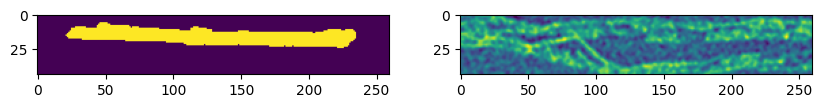

In [54]:
vol_slice = vol_slice[25]
img_slice = img_slice[25]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.imshow(vol_slice)
ax2.imshow(img_slice)
plt.show()

(1, 1571, 1893, 60)
(1, 1571, 1893, 60)


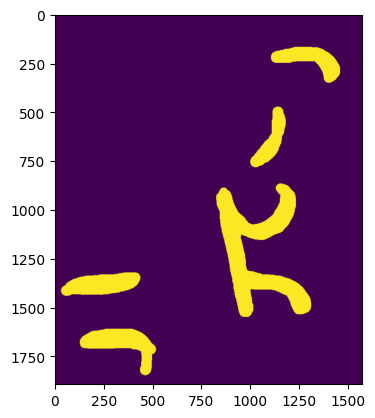

In [45]:

with wk.webknossos_context(url="http://dl.ash2txt.org:8080/", token="64ZRFDrbuWkM5FMv96cdnQ"):
    # there is likely a better way to do this , wk has a dataset.open_as_remote , but it doesnt
    # directly have user bounding boxes, which we need -- will do more looking into it
    # for wk data we will always return a dictionary containing both image and label
    annotation_id = "678d7e580100001956ee6494"
    anno_name = "Volume"
    image_name = "first_letters_segment"
    patch_bbox = None
    bbox_number = 0

    annotation = wk.Annotation.download(f"{annotation_id}")
    dataset = annotation.get_remote_annotation_dataset()
    anno_mag_view = dataset.layers[f'{anno_name}'].get_finest_mag()
    mag = anno_mag_view.mag
    vol_mag_view = dataset.layers[f'{image_name}'].mags[mag]

    if patch_bbox is not None:
        # when we get patches, we assume z, y, x -- need to reorder for wk which is x, y, z
        patch_bbox = [
            [patch_bbox[0][2], patch_bbox[0][1], patch_bbox[0][0]],
            [patch_bbox[1][2], patch_bbox[1][1], patch_bbox[1][0]],
        ]
        bbox = patch_bbox
    else:
        # Fall back to user_bounding_boxes
        bbox = annotation.user_bounding_boxes[bbox_number]

    anno_data = anno_mag_view.read(
        absolute_bounding_box=bbox
    )

    image_data = vol_mag_view.read(
        absolute_bounding_box=bbox
    )

    print(anno_data.shape)
    print(image_data.shape)


    # wk data shape is (c, x, y, z) but my entire pipeline assumes (c, z, y, x)
    # all our data is greyscale, and all my augs/etc from this point require
    # no addtl channels so we will squeeze the data and then transp the axes

    anno_data = np.transpose(np.squeeze(anno_data, axis=0), (2, 1, 0)).copy()
    image_data = np.transpose(np.squeeze(image_data, axis=0), (2, 1, 0)).copy()


    plt.imshow(anno_data[32])
    plt.show()

In [39]:
print(dataset.layers)

{'first_letters_segment': Layer('first_letters_segment', dtype_per_channel=uint16, num_channels=1), 'Volume': Layer('Volume', dtype_per_channel=uint32, num_channels=1)}
